# Redis

Guida all'installazione, ai comandi di base di Redis e ad alcune strutture dati usando Python e [Redis-py](https://github.com/redis/redis-py), l'interfaccia di Python per la memorizzazione chiave-valore di [Redis](https://redis.io/)

### Strutture dati in questa guida
*   Liste
*   Sets
*   Hash

<br>

---

### Link utili (in inglese)

[Introduzione ai tipi di dati in Redis](https://redis.io/topics/data-types-intro)

[Usare un database Redis con Python e come trovare host, porta e password](https://www.youtube.com/watch?v=Nl5om8Vl85Y)

[Documentazione di Redis](https://redis.io/documentation)

[Comandi di Redis](https://redis.io/commands#)

## Installazione

Per installare Redis basta semplicemente usare

In [ ]:
pip install redis

Per connettersi al nostro database è necessario importare la libreria `redis` e usarla con i nostri valori di host, porta e password. Per ottenerli è necessario [registrarsi a Redis Cloud](https://redis.com/try-free/) e creare un database con il piano gratuito.

Il comando `ping()` serve a sapere se la connessione è andata a buon fine (True/False)



In [ ]:
import redis

r = redis.Redis(host='redis-12375.c268.eu-west-1-2.ec2.cloud.redislabs.com', 
                port=12375, 
                password='FP3ib1qOOIJwTizIbUOrlwpW0ZYpFGAN',
                decode_responses=True)

r.ping()

True

## Comandi CRUD e di base

Il comando `SET` serve a impostare una `key` e assegnarle una stringa `value`, similmente a MongoDB

In [ ]:
r.set("nome", "Nico")

True

Il comando `GET` restituisce il `value` di una `key`, che può essere memorizzato in una variabile e stampato

In [ ]:
nome = r.get("nome")
print(nome)

Nico


In [ ]:
r.set("cognome", "Pierro")

True

Il comando `EXISTS` serve a determinare se una `key` esiste, restituendo 0 in caso negativo e 1 in caso positivo

In [ ]:
r.exists("nome")

1

Il comando `KEYS` restituisce tutte le `key` che corrispondono a un `pattern`, come  una `find()` di MongoDB. <br>
In Python `keys()` se lasciato vuoto corrisponde a `KEYS *` e seleziona tutte le `key`

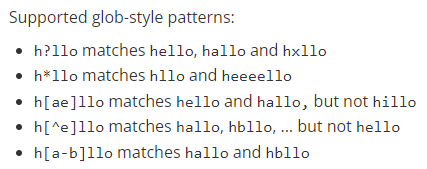

In [ ]:
r.keys()

['nome', 'cognome']

In [ ]:
r.keys("n???")

['nome']

In [ ]:
r.keys("n*")

['nome']

In [ ]:
r.keys("*nome")

['nome', 'cognome']

Il comando `DEL` serve a eliminare le `key` specificate 

In [ ]:
r.delete("nome")

1

Il comando `GET` non troverà più la `key` *nome*



In [ ]:
nome = r.get("nome")
print(nome)

None


Proviamo a impostare una `key` *age* con `value` *18*



In [ ]:
r.set("age", 18)

True

In [ ]:
age = r.get("age")
print(age)

18


Il comando `TTL` restituisce il Time To Live rimanente di una `key`. Una volta scaduto, la `key` viene rimossa dal dataset. <br>
Restituisce -1 se la chiave non esiste (magari perché già scaduta) o non ha assegnata una scadenza

In [ ]:
r.ttl("age")

-1

In [ ]:
r.exists("age")

1

Il comando `EXPIRE` imposta una scadenza (TTL) a una `key`

In [ ]:
# time to live di dieci secondi
r.expire("age", 10)

r.ttl("age")

10

Il comando `FLUSHALL` elimina le `key` di **TUTTI** i nostri database esistenti

In [ ]:
r.flushall()

True

Usando il comando `KEYS` il dataset risulterà vuoto

In [ ]:
r.keys()

[]

Il comando `SETEX` imposta il `value` e la scadenza (TTL) di una `key` con un unico comando

In [ ]:
r.setex("city", 5, "Milano")
r.ttl("city")

5

In [ ]:
r.set(97452, 1500)

True

In [ ]:
r.get(97452)

'1500'

In [ ]:
saldo = int(r.get(97452))
saldo-=150
r.set(97452, saldo)
r.get(97452)

'1350'

## Liste
Le liste di Redis sono semplicemente liste di stringhe, ordinate per ordine di inserimento. <br> 

Risulta facile accedere, aggiungere ed eliminare gli elementi vicino agli estremi, mentre ciò risulta più complicato (specialmente nel caso di liste molto grandi) nel mezzo dal momento che la ricerca è basata sulla posizione e quindi sull'indice.

La lunghezza massima di una lista è di 2^32 - 1 elementi.

Il comando `LPUSH` aggiunge un nuovo elemento in cima alla lista



In [ ]:
r.lpush("friends", "Emanuele")

1

Il comando `RPUSH` aggiunge un nuovo elemento in fondo alla lista

In [ ]:
r.rpush("friends", "Cristina")

2

Aggiungiamo altri elementi alla lista *friends*

In [ ]:
r.rpush("friends", "Aymane")

3

In [ ]:
r.rpush("friends", "Lilian")

4

In [ ]:
r.lpush("friends", "Lilian")

5

Il comando `LRANGE` restituisce gli elementi di una lista compresi nell'intervallo specificato, basato sugli indici

In [ ]:
r.lrange("friends", 0, 3)

['Lilian', 'Emanuele', 'Cristina', 'Aymane']

Il comando `LPOP` rimuove e restituisce il primo elemento della lista

In [ ]:
r.lpop("friends")

'Lilian'

Visualizzando nuovamente la lista risulterà rimosso l'elemento "Lilian"

In [ ]:
r.lrange("friends", 0, -1)

['Emanuele', 'Cristina', 'Aymane', 'Lilian']

Il comando `RPOP` rimuove e restituisce l'ultimo elemento della lista

In [ ]:
r.rpop("friends")

'Lilian'

Con la rimozione dell'elemento "Lilian" ora la lista risulterà avere tre elementi

In [ ]:
r.lrange("friends", 0, -1)

['Emanuele', 'Cristina', 'Aymane']

## Sets
I set di Redis sono collezioni non ordinate di stringhe. <br>

Non ammettono valori duplicati: aggiungere un elemento già presente farà sempre avere una copia di quell'elemento. Nella pratica significa che non è necessario fare alcun controllo esistenziale con `EXISTS`. <br>

La grandezza massima dei set è uguale a quella delle liste: 2^32 - 1 *membri*. 

Il comando `SADD` permette di aggiungere i *membri* specificati al set memorizzato nella `key`

In [ ]:
r.sadd("hobbies", "swimming", "programming")

2

Il comando `SMEMBERS` restituisce tutti i *membri*, valori del set memorizzato nella `key`

In [ ]:
r.smembers("hobbies")

{'programming', 'swimming'}

Provando ad aggiungere un elemento già presente nel set *hobbies* verrà restituito 0, che indica che non è stato aggiunto nulla.

In [ ]:
r.sadd("hobbies", "swimming")

0

Il comando `SREM` rimuove tutti i *membri* specificati dal set memorizzato nella `key`

In [ ]:
r.srem("hobbies", "swimming")
r.smembers("hobbies")

{'programming'}

## Hashes
Gli hash di Redis sono associazioni tra `fields` e `values` e sono quindi perfetti per rappresentare oggetti. (Ad esempio un utente con un numero di campi come nome, cognome, età e così via)

Anche se gli hash sono usati principalmente per rappresentare oggetti, sono in grado di memorizzare molti elementi e possono quindi essere usati anche per altri compiti.

Ogni hash può immagazzinare fino a 2^32 - 1 coppie field-value

Il comando `HSET` imposta un `value` al `field` nell'hash memorizzato nella `key`

`key` *person* <br>
`field` *name* <br>
`value` *Filippo* <br>

In [ ]:
r.hset("person", "name", "Filippo")

1

In [ ]:
r.hset("person", "surname", "Zhao")

1

Il comando `HGET` restituisce il `value` di un `field` hash

In [ ]:
r.hget("person", "name")

'Filippo'

Proviamo ad aggiungere il `field` *age* con `value` *18* alla `key` *person*

In [ ]:
r.hset("person", "age", 18)
r.hget("person", "age")

'18'

Il comando `HGETALL` restituisce tutti i `fields` e `values` dell'hash memorizzato nella `key`

In [ ]:
r.hgetall("person")

{'age': '18', 'name': 'Filippo', 'surname': 'Zhao'}

Il comando `HDEL` rimuove i `fields` specificati dall'hash memorizzato nella `key`

In [ ]:
r.hdel("person", "age")

1

Inserendo un `field` già presente nella stessa `key` verrà modificato il suo `value`

In [ ]:
r.hset("person", "surname", "Rossi")

0

Il `field` *age* non risulterà più presente nella `key` *person*

In [ ]:
r.hgetall("person")

{'name': 'Filippo', 'surname': 'Rossi'}

Il comando `HEXISTS` serve a determinare se un `field` hash esiste ed è memorizzato nella `key`

In [ ]:
r.hexists("person", "age")

False

## Esercizio
Creare un database chiamato regione dove inserire i nomi delle regioni e i rispettivi capoluoghi di regione. <br> Inserire inoltre per ogni regione le province con il numero di abitanti di quella provincia. <br> Scrivere poi il codice per avere: 
1. gli abitanti di una certa provincia inserito dall'utente <br>
2. il capoluogo di regione di una certa regione <br>
3. gli abitanti di una regione inserita dall'utente

